# Pymaceuticals Inc.
---

### Analysis

- The population of mice is fairly evenly distributed between female and male.
- Of the ten drug regimens, four drug regimens results were analyzed for effectiveness.  
- Capomuline and Ramicane had significantly smaller final tumor volumes for each mice tested compared to Infubinol and Ceftamin. 
- Upon further analysis of a single mouse on Capomulin, tumor volume redueced from 45 mm3 to 23 mm3 over a period of 40 days. 
- For mice placed on Capomulin, there is a strong correlation (0.84) between mouse weight and average tumor volume. The larger the mouse is, the larger the average final tumor volume. 
 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, on=["Mouse ID"])
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Check the number of mice.
total_mice = mouse_results["Mouse ID"].count()
total_mice
unique_mice = mouse_results["Mouse ID"].nunique()
print(f"""Total # of datapoints: {total_mice} 
# of unique Mice IDs: {unique_mice}""")

Total # of datapoints: 1893 
# of unique Mice IDs: 249


In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use duplicated() to find duplicated values based on "Mouse ID" and "Timepoint" columns.
# Then use loc and .unique() to find and show the duplicated Mouse ID.  
duplicated_mice = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicated_mice # g989 shown. 

array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
# Use loc to store duplicated data. 
duplicated_data = mouse_results.loc[mouse_results["Mouse ID"] == "g989"]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_mouse_results = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
cleaned_mouse_results = mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_mouse_results.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [60]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_results.index)

1888

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each 
# drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_stats = cleaned_mouse_results.groupby(["Drug Regimen"])

tumor_sum_stats = pd.DataFrame() 

tumor_sum_stats["Mean"] = regimen_stats["Tumor Volume (mm3)"].mean()
tumor_sum_stats["Median"] = regimen_stats["Tumor Volume (mm3)"].median()
tumor_sum_stats["Variance"] = regimen_stats["Tumor Volume (mm3)"].var()
tumor_sum_stats["Std Dev"] = regimen_stats["Tumor Volume (mm3)"].std()
tumor_sum_stats["SEM"] = regimen_stats["Tumor Volume (mm3)"].sem()

tumor_sum_stats.round(2) #round to two places

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
other_regimen_stats = regimen_stats.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}) 
other_regimen_stats.round(2) # round to two places. 

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

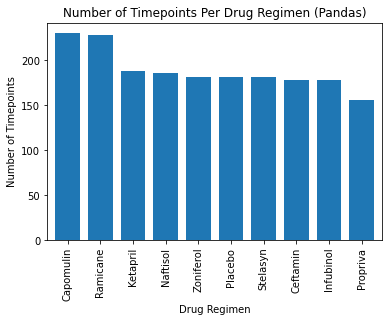

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
values = cleaned_mouse_results.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pandas_bar_fig = values.plot(kind="bar", ylabel = "Number of Timepoints", title="Number of Timepoints Per Drug Regimen (Pandas)", width=.75)

Text(0.5, 1.0, 'Number of Timepoints Per Drug Regimen (Pyplot)')

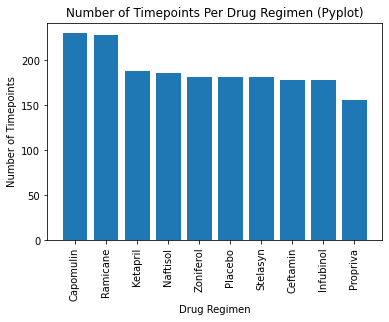

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
values = cleaned_mouse_results.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
x_axis = values.index

plt.bar(x_axis, values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.title("Number of Timepoints Per Drug Regimen (Pyplot)")

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice (Pandas)'}, ylabel='Sex'>

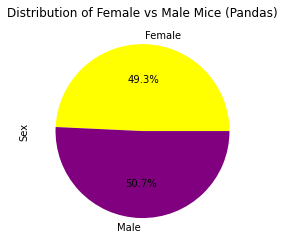

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors=["Yellow", "Purple"]
sizes = cleaned_mouse_results.groupby(["Sex"])["Mouse ID"].count()
sizes.plot(kind="pie", ylabel = "Sex", autopct="%1.1f%%", colors=colors, title="Distribution of Female vs Male Mice (Pandas)")

Text(0.5, 1.0, 'Distribution of Female vs Male Mice (Pyplot)')

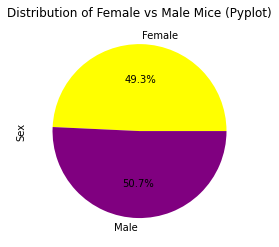

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = cleaned_mouse_results.groupby(["Sex"])["Mouse ID"].count()
gender = sizes.index

plt.pie(sizes, labels=gender, autopct="%1.1f%%", colors=colors)
plt.ylabel("Sex")
plt.title("Distribution of Female vs Male Mice (Pyplot)")


## Quartiles, Outliers and Boxplots

In [67]:
cleaned_mouse_results.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(cleaned_mouse_results.groupby(["Mouse ID"])["Timepoint"].max())
last_timepoint.reset_index(drop=True) #reset index

last_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [69]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(cleaned_mouse_results, last_timepoint, on=("Mouse ID", "Timepoint"), how="right")
final_df = final_df.rename(columns={"Timepoint": "Final Timepoint", "Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint,Final Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [70]:
# Put treatments into a list for the "for loop" (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty lists for each treatment to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# Use iterrows() to iterate through each row to add to the treatment's list.
# iterrows() iterates over Dataframe rows as (index, Series) pairs. 
for index, row in final_df.iterrows():     
    if row["Drug Regimen"]  == treatments[0]:
        tumor_cap.append(row["Final Tumor Volume (mm3)"])
    if row["Drug Regimen"]  == treatments[1]:
        tumor_ram.append(row["Final Tumor Volume (mm3)"])        
    if row["Drug Regimen"]  == treatments[2]:
        tumor_inf.append(row["Final Tumor Volume (mm3)"])
    if row["Drug Regimen"]  == treatments[3]:
        tumor_cef.append(row["Final Tumor Volume (mm3)"])

# Compile all lists into a single dataframe
plotting_df = pd.DataFrame({ treatments[0]: tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })

In [71]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    quartiles = plotting_df[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Outliers
    values = plotting_df[treatment] #Store all values in new list
    outliers = [x for x in values if x < lower_bound or x > upper_bound] #use list comp to find outliers
   
    msg = f"""
        {treatment}
        ---------------------------
        Lower Quartile: {round(lowerq,2)}
        Upper Quartile: {round(upperq,2)}
        Interquartile range: {round(iqr,2)}
        Lower Bound: {round(lower_bound,2)}
        Upper Bound: {round(upper_bound,2)}
        Outliers: {outliers}
        """
    print(msg)


        Capomulin
        ---------------------------
        Lower Quartile: 32.38
        Upper Quartile: 40.16
        Interquartile range: 7.78
        Lower Bound: 20.7
        Upper Bound: 51.83
        Outliers: []
        

        Ramicane
        ---------------------------
        Lower Quartile: 31.56
        Upper Quartile: 40.66
        Interquartile range: 9.1
        Lower Bound: 17.91
        Upper Bound: 54.31
        Outliers: []
        

        Infubinol
        ---------------------------
        Lower Quartile: 54.05
        Upper Quartile: 65.53
        Interquartile range: 11.48
        Lower Bound: 36.83
        Upper Bound: 82.74
        Outliers: [36.3213458]
        

        Ceftamin
        ---------------------------
        Lower Quartile: 48.72
        Upper Quartile: 64.3
        Interquartile range: 15.58
        Lower Bound: 25.36
        Upper Bound: 87.67
        Outliers: []
        


In [72]:
plotting_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


Text(0, 0.5, 'Final Tumor Volumes (mm3)')

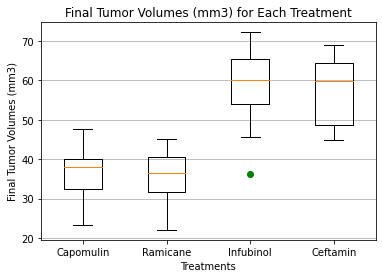

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(plotting_df, labels=treatments, sym="g") #sym determines the symbol/color of outliers. 
ax.set_title("Final Tumor Volumes (mm3) for Each Treatment")
ax.yaxis.grid(True)
ax.set_xlabel("Treatments")
ax.set_ylabel("Final Tumor Volumes (mm3)")

## Line and Scatter Plots

### Line Plot

Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin.

In [74]:
# Get the list of mice being treated with Capomulin. 
all_capomulin = cleaned_mouse_results.loc[mouse_results["Drug Regimen"] == "Capomulin"]
all_capomulin["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [75]:
# Create a dataframe with all the data for one mouse from the above list (s185).
single_mouse_results = cleaned_mouse_results.loc[mouse_results["Mouse ID"] == "s185"]
single_mouse_results.reset_index(drop=True) # reset index. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


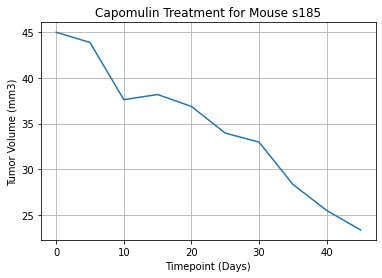

In [76]:
# Plot by accessing dataframe. 
plt.plot(single_mouse_results["Timepoint"],single_mouse_results["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse s185")
plt.grid(axis="both")

### Scatterplot

Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen.

In [86]:
# Group all capomulin dataframe by mouse ID, and grab average tumor volume for each. 
capomulin_mean_tum = all_capomulin[["Mouse ID","Tumor Volume (mm3)","Weight (g)" ]].groupby(["Mouse ID"]).mean()
# Note: the weight is the same for each datapoint (as the original csv file did not track weight over time.)
# Therefore, the mean() applied to the series of weights for a mouse will return the original value. 
capomulin_mean_tum = capomulin_mean_tum.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
capomulin_mean_tum

,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


Text(0.5, 1.0, 'Capomulin: Average Tumor Volume vs. Mouse Weight')

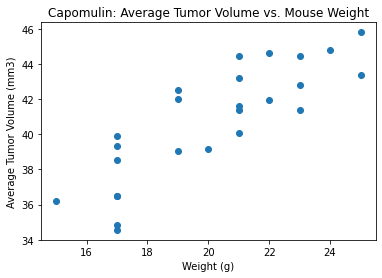

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c_weight = capomulin_mean_tum["Weight (g)"]
c_tum = capomulin_mean_tum["Average Tumor Volume (mm3)"]
plt.scatter(c_weight, c_tum )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


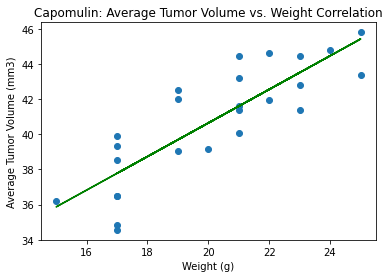

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation
# The st.pearsonr() function returns two values--the correlation coefficient and the p-value.

correlation = st.pearsonr(c_weight, c_tum)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

# Replicate scatterplot.
plt.scatter(c_weight, c_tum)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Average Tumor Volume vs. Weight Correlation")

# Calculate linear regression. 
# The st.linregress() function accepts the x and y values, 
# and returns slope, intercept, rvalue, pvalue, and standard error. 
slope, intercept, rvalue, pavalue, stderr = st.linregress(c_weight, c_tum)

# Find series of regression values. 
regress_values = c_weight * slope + intercept  

# Plot linear regression line
plt.plot(c_weight, regress_values, "g") 